#Question 1
#Does implementation of WHS influence awareness of police inadequacies?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [2]:
#import df

data_file = "https://raw.githubusercontent.com/ApollocreedXI/MESA-8410-Final-Project/refs/heads/main/police_survey_cleaned_Q1.csv"

police_survey_df = pd.read_csv(data_file)

In [3]:
#checking data was imnported correctly
police_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1051 non-null   int64  
 1   uid                  1051 non-null   int64  
 2   gender               1051 non-null   object 
 3   e_wcase              1051 non-null   object 
 4   e_effective          1051 non-null   object 
 5   e_sensitivity        1051 non-null   float64
 6   treatment            1051 non-null   object 
 7   regular_whd          1051 non-null   float64
 8   women_whd            1051 non-null   float64
 9   b_uid                1051 non-null   int64  
 10  b_wcase              1051 non-null   object 
 11  b_effective          1051 non-null   object 
 12  b_sensitivity        1051 non-null   float64
 13  e_wcase_encoded      1051 non-null   float64
 14  b_wcase_encoded      1051 non-null   float64
 15  e_effective_encoded  1051 non-null   f

In [4]:
#Let's look as endline effectiveness for the different treatment groups
#As there are two different treatment groups we will separate them out

#Creating new data frame for regular and Women_whd
whd_df = police_survey_df[(police_survey_df["regular_whd"] != 1)]

regular_df = police_survey_df[(police_survey_df["women_whd"] != 1)]

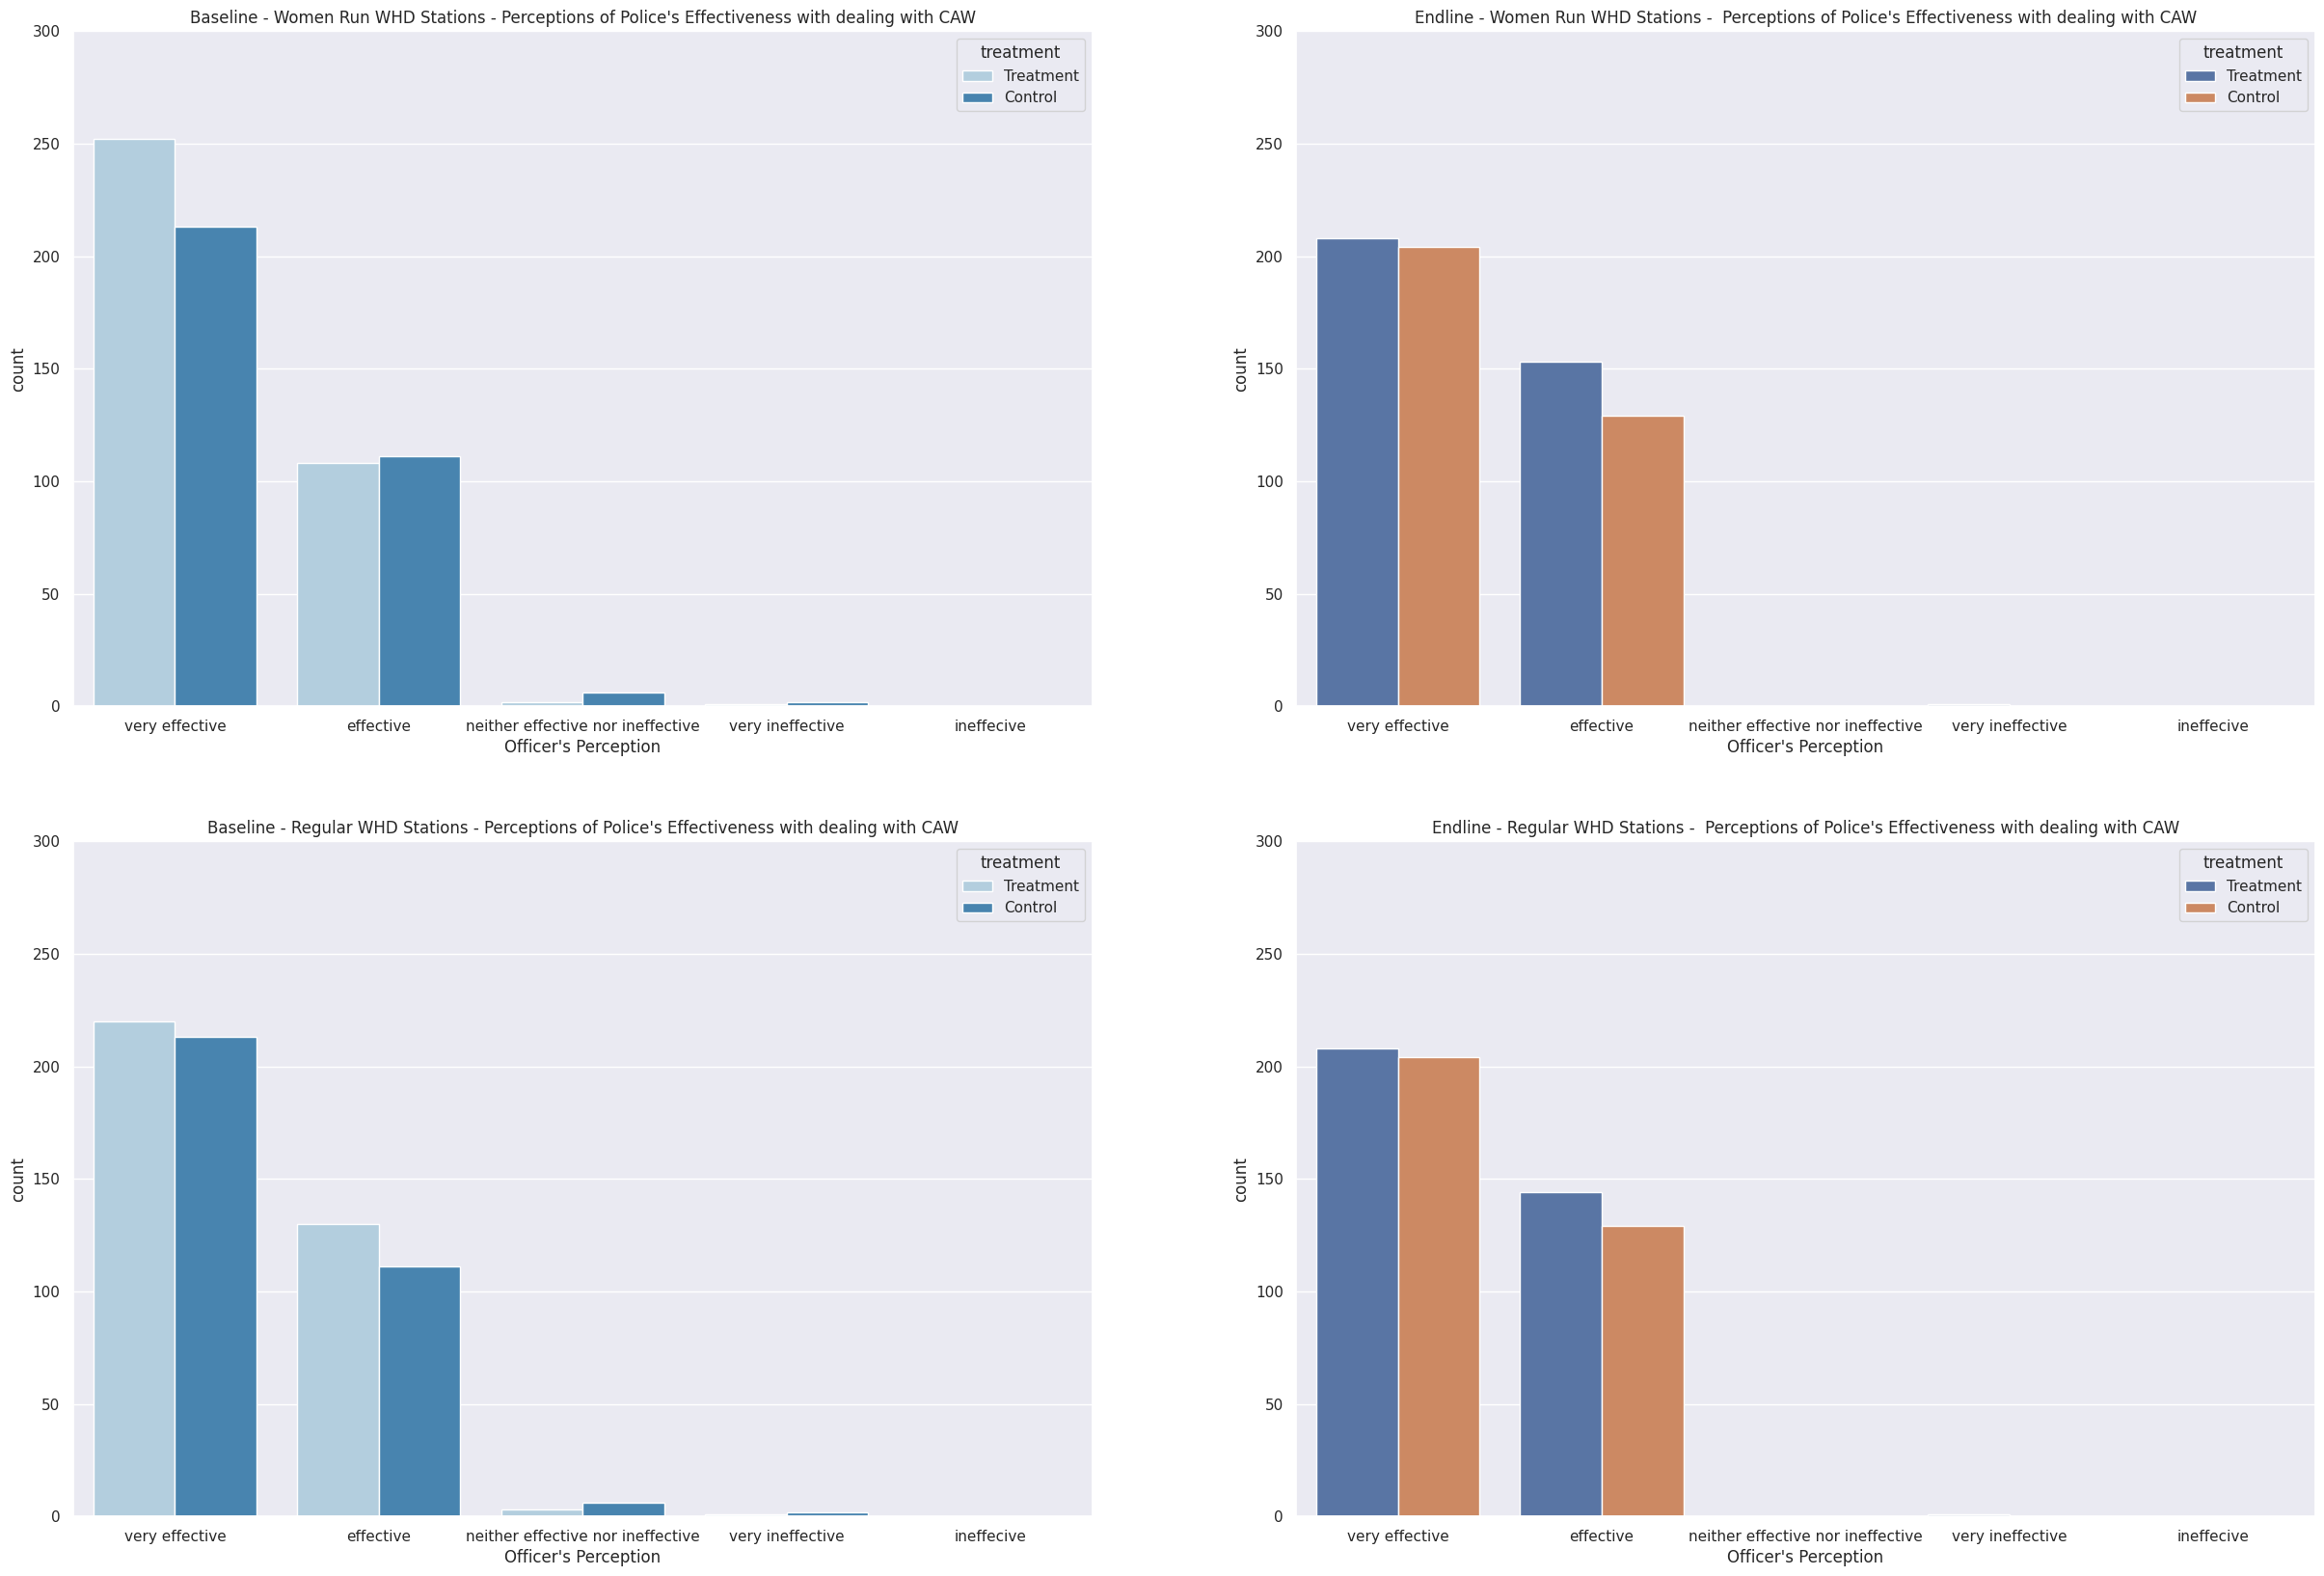

In [5]:
#Creating visuals for both treatment groups against the control group

#Setting the theme
sns.set_theme(style='darkgrid')

#setting up the grid
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(30,20))

# Flatten axes array
axes = axes.flatten()

#Creating order for categories
cat_order = ["very effective", "effective", "neither effective nor ineffective", "very ineffective", "ineffecive"]

#Creating Order for hue
hue_ord = ["Treatment", "Control"]

# Create a count plot for Women Run
_ = sns.countplot(data = whd_df, x= "b_effective", hue = "treatment", ax = axes[0], palette= "Blues", order = cat_order, hue_order = hue_ord)
_ = sns.countplot(data = whd_df, x= "e_effective", hue = "treatment", ax = axes[1], order = cat_order, hue_order = hue_ord)

#f
_ = sns.countplot(data = regular_df, x= "b_effective", hue = "treatment", ax = axes[2], palette= "Blues", order = cat_order, hue_order = hue_ord)
_ = sns.countplot(data = regular_df, x= "e_effective", hue = "treatment", ax = axes[3], order = cat_order, hue_order = hue_ord)

#Setting Y axis range
for i in range(0,4):
  axes[i].set_ylim([0,300])
  axes[i].set_autoscaley_on(False)


#Setting Title
axes[0].set_title("Baseline - Women Run WHD Stations - Perceptions of Police's Effectiveness with dealing with CAW")
axes[1].set_title("Endline - Women Run WHD Stations -  Perceptions of Police's Effectiveness with dealing with CAW")
axes[2].set_title("Baseline - Regular WHD Stations - Perceptions of Police's Effectiveness with dealing with CAW")
axes[3].set_title("Endline - Regular WHD Stations -  Perceptions of Police's Effectiveness with dealing with CAW")
#setting axis labels
_ = axes[0].set_xlabel("Officer's Perception")
_ = axes[1].set_xlabel("Officer's Perception")
_ = axes[2].set_xlabel("Officer's Perception")
_ = axes[3].set_xlabel("Officer's Perception")

Next, let's run some statistical tests to see if there are any differences in baseline and endline proportions for the three treatment arms. First, let's check to see if any responses are less than 5. Statistics tests like the chi-square and Mcnemar test assume each response has greater than five responses.

In [6]:
# Perform value counts to see if count > 5 is satisfied for women run WHD df

v_count = whd_df[whd_df["women_whd"] == 1]["b_effective"].value_counts()

v_count = v_count.reset_index()

v_count

,b_effective,count
0,very effective,252
1,effective,108
2,neither effective nor ineffective,2
3,very ineffective,1
4,ineffective,1


In [7]:
#Value counts for regular WHD
v_count = regular_df[regular_df["regular_whd"] == 1]["e_effective"].value_counts()

v_count = v_count.reset_index()

v_count

,e_effective,count
0,very effective,208
1,effective,144
2,very ineffective,1
3,ineffective,1


In [8]:
#Value counts for control group

v_count = whd_df[whd_df["women_whd"] != 1]["b_effective"].value_counts()

v_count = v_count.reset_index()

v_count

,b_effective,count
0,very effective,213
1,effective,111
2,neither effective nor ineffective,6
3,very ineffective,2
4,ineffective,1


###Since all treatment arms value counts for anything other than very effective and effective are below 5 or just above it I will remove these. Chi-square and Mcnemar test assumes that every response has at least 5 values.

 The chi square test can be used here, but it is not the best in the situation of paired data. This is because the chi-square test assumes each group (baseline and endline) is independent of the other. Since this is not the case, the chi-square test is not the best test to conduct. In investigating, the Mcnemar test is the best for pair categorical data. It tests if there is a statistically significant difference in the proportions of the paired data. As we are reducing the responses to a binomial setup (Very effective, effective) we can utilize this test.

In [9]:
#Removing rows that are not very effective or effective for both df

whd_df_clean = whd_df[((whd_df["b_effective"] == "very effective") | (whd_df["b_effective"] == "effective")) & ((whd_df["e_effective"] == "very effective") | (whd_df["e_effective"] == "effective"))]
regular_df_clean = regular_df[((regular_df["b_effective"] == "very effective") | (regular_df["b_effective"] == "effective")) & ((regular_df["e_effective"] == "very effective") | (regular_df["e_effective"] == "effective"))]

#Checking baseline counts
v_count = whd_df_clean[whd_df_clean["women_whd"] == 1]["b_effective"].value_counts()

v_count = v_count.reset_index()

v_count

,b_effective,count
0,very effective,250
1,effective,108


In [10]:
#Checking Endline counts

v_count = whd_df_clean[whd_df_clean["women_whd"] == 1]["e_effective"].value_counts()

v_count = v_count.reset_index()

v_count

,e_effective,count
0,very effective,207
1,effective,151


In [11]:
#Quick check for regular WHD
v_count = regular_df_clean[regular_df_clean["regular_whd"] == 1]["b_effective"].value_counts()

v_count = v_count.reset_index()

v_count

,b_effective,count
0,very effective,218
1,effective,130


## We have prepaired the data for the Mcnemar test. We will import approprate libraries to perform the test

In [12]:
#referances to code: https://www.statology.org/mcnemars-test-python/

#Importing appropriate libraries
from statsmodels.stats.contingency_tables import mcnemar

#focus on Women run WHD treatment group
whd_df_treatment = whd_df_clean[whd_df_clean["women_whd"] == 1]

contin_table_women = pd.crosstab(whd_df_treatment['b_effective'], whd_df_treatment['e_effective'], margins= True)

display(contin_table_women)

e_effective,effective,very effective,All
b_effective,,,
effective,62,46,108
very effective,89,161,250
All,151,207,358


To read this table we can focus first on the diagonals. The top left entry tells us there were 62 respondents that reported effective at both baseline and endline. The first row and second column tell us that 46 respondents who initially reported effective now respond "very effective". One interesting thing to note is that total baseline "very effective" responses are significantly lower at endline than baseline. This shows a possible awareness of police inadequacies.  

In [13]:
#Performing Mcnemar test
#arguments of the function
#exact: If this is True the test will assume a binomial distribution, otherwise it will use a chi-square distribution
#correction: This is used if any of the responses are less than 5

mcnemar_test = mcnemar(contin_table_women, exact = False, correction = False)

print(mcnemar_test)

pvalue      0.00021487783719063077
statistic   13.696296296296296


The test tells us we will reject the null hypothesis. That is the proportions at endline and baseline are the same. Graphically for the women-run WHD we did see a significant change from the "very effective" responses at baseline and endline. This illustrates that there was an increase in awareness of inadequacies. Let us conduct the test for the remaining treatment groups

In [14]:
#focus on regular WHD treatment group
regular_df_treatment = regular_df_clean[regular_df_clean["regular_whd"] == 1]

contin_table_regular = pd.crosstab(regular_df_treatment['b_effective'], regular_df_treatment['e_effective'], margins= True)

display(contin_table_regular)

e_effective,effective,very effective,All
b_effective,,,
effective,64,66,130
very effective,79,139,218
All,143,205,348


We can see that there was not a big shift in the "very effective" responses. This is what we saw in the visual earlier in the visuals.

In [15]:
#Performing Mcnemar test

mcnemar_test = mcnemar(contin_table_regular, exact = False, correction = False)

print(mcnemar_test)

pvalue      0.2803242448919103
statistic   1.1655172413793105


We cannot reject the null hypothesis using 0.05 as our p value theshold. This is expected as in the visual we did not see a significant shift of responses from baseline and endline.

In [16]:
#Conducting the test for the control group. Can uses either df as the responses for the control group is the same
control_df = regular_df_clean[regular_df_clean["regular_whd"] != 1]

contin_table_control = pd.crosstab(control_df["b_effective"], control_df['e_effective'], margins= True)

display(contin_table_control)

e_effective,effective,very effective,All
b_effective,,,
effective,57,54,111
very effective,68,145,213
All,125,199,324


We see slight shifts in responses. However, they are not significant.

In [17]:
#Performing Mcnemar test

mcnemar_test = mcnemar(contin_table_control, exact = False, correction = False)

print(mcnemar_test)

pvalue      0.204976404740417
statistic   1.6065573770491803


Therefore, in running this test for all treatment groups in this experiment we can see that only the women-run WHD stations showed a statistical significance. One might be tempted to say that is because there may be more women at the stations with women running the WHD. Let's see if that is true.

In [18]:
#Checking the proportions of women and male officers in the Women run WHD df

gender_value = whd_df["gender"].value_counts(normalize = True)

gender_value = gender_value.reset_index()

display(gender_value)

,gender,proportion
0,male,0.885222
1,female,0.114778


In [19]:
#Checking the distrubtion again for regular WHD
gender_value = regular_df["gender"].value_counts(normalize = True)

gender_value = gender_value.reset_index()

display(gender_value)

,gender,proportion
0,male,0.889374
1,female,0.110626


Interestingly, there is about an identical distribution of genders for both treatment arms. Therefore, the statistical significance of our Mcnemar test shows that having a woman running the WHD suggests that there might be an increase in awareness of police inadequacies for women.

#Question 2
##Does the presence of WHD change women's perceived safety or perceived effectiveness of police stations?

In [20]:
#imported df

data_file = "https://raw.githubusercontent.com/ApollocreedXI/MESA-8410-Final-Project/refs/heads/main/citizen_survey_clean_Q2.csv"

citizen_survey_df = pd.read_csv(data_file)

In [21]:
#drop redundant variable
citizen_survey_df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"], inplace = True)

In [22]:
citizen_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uid                    2533 non-null   int64  
 1   b_visit                2533 non-null   float64
 2   b_pol_handling         2533 non-null   float64
 3   b_safety               2533 non-null   float64
 4   e_visit                2533 non-null   float64
 5   e_pol_handling         2533 non-null   float64
 6   e_safety               2533 non-null   float64
 7   e_gender               2533 non-null   object 
 8   hh_id                  2533 non-null   float64
 9   member_gender          2533 non-null   object 
 10  ps_code                2533 non-null   float64
 11  population             2533 non-null   int64  
 12  urban                  2533 non-null   object 
 13  dist_urban             2533 non-null   float64
 14  treatment              2533 non-null   object 
 15  regu

Let's look at the distributions of the safety variable in our df

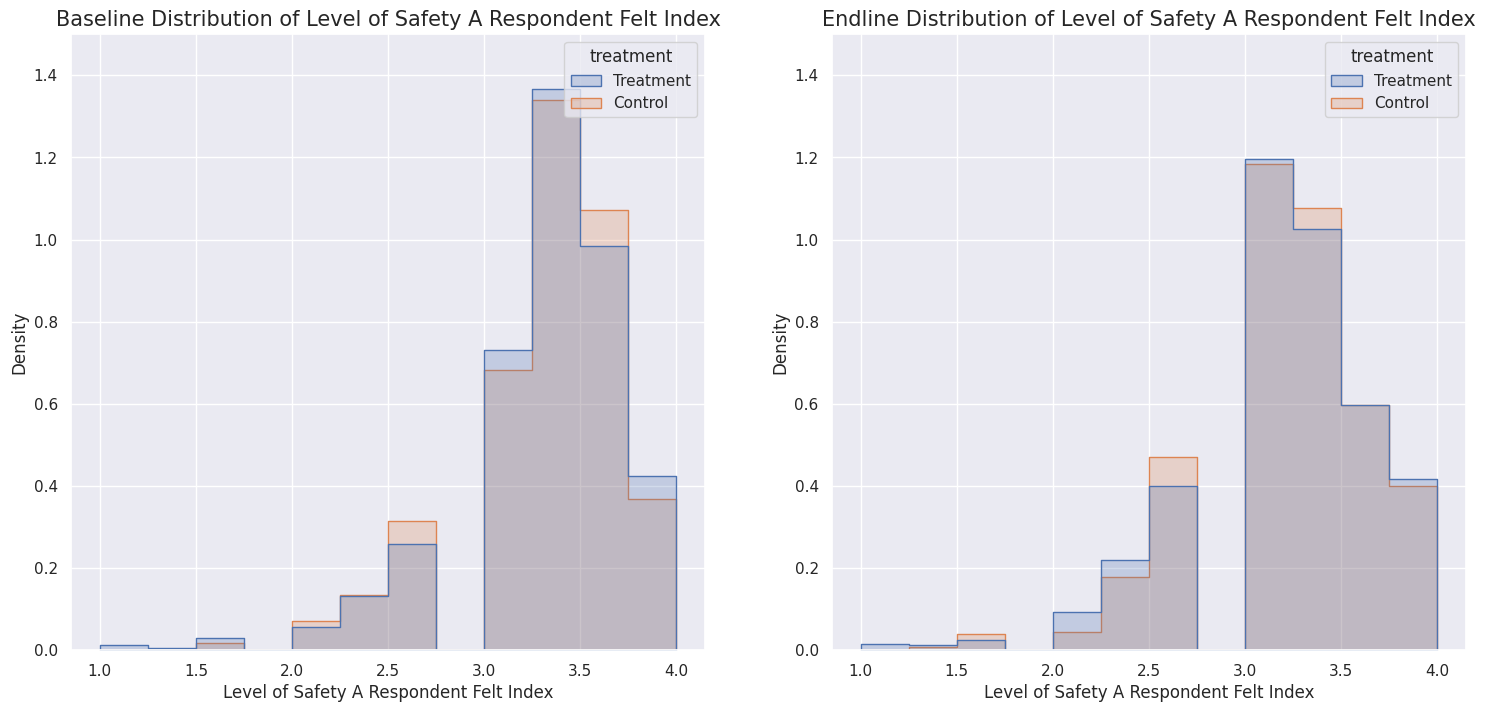

In [23]:
#Look at a visual of the values in b_safety

# create the plot dimensions
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,8))

_ = sns.histplot(data = citizen_survey_df, x = "b_safety", bins = 12, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[0])
_ = sns.histplot(data = citizen_survey_df, x = "e_safety", bins = 12, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[1])

_ = axes[0].set_title("Baseline Distribution of Level of Safety A Respondent Felt Index", size = 15)
_ = axes[1].set_title("Endline Distribution of Level of Safety A Respondent Felt Index", size  = 15)

_ = axes[0].set_xlabel("Level of Safety A Respondent Felt Index")
_ = axes[1].set_xlabel("Level of Safety A Respondent Felt Index")

#Setting Y axis range
for i in range(0,2):
  axes[i].set_ylim([0,1.5])
  axes[i].set_autoscaley_on(False)

Overall, I would say that the data is normally distributed in both baseline and endline. Given this, I can use a parametric test which is more accurate than nonparametric tests. For this situation we will be interested in if the means differ at endline for the control group and treatment group when treatment occurs. For this, we will use a paired T-test for each treatment group. This test has a few assumptions. One is that the data must be normally distributed, and for the most part this data is. One could argue there is a slight left skew. The second assumption is that the data is continuous which the index variable is. lastly, the sample data should be randomly sampled of the population of interest.

In [24]:
#Conducting a pairwise T- Test for both the control group and treatment group

import scipy.stats as stats

#Creating treatment and control dataframes
treatment_df = citizen_survey_df[citizen_survey_df["treatment"] == "Treatment"]
control_df = citizen_survey_df[citizen_survey_df["treatment"] == "Control"]

#Creating pre and post dataframes for treatment

pre_treat = treatment_df['b_safety']
post_treat = treatment_df['e_safety']

#Creating pre and post dataframes for control

pre_control = control_df['b_safety']
post_control = control_df['e_safety']


In [25]:
#Conducting paired T-test for treatment group

import scipy.stats as stats

t_test_treat = stats.ttest_rel(pre_treat,post_treat)

display(t_test_treat)

TtestResult(statistic=8.652660146658762, pvalue=1.1789087488384061e-17, df=1640)

In [26]:
#Conducting paired T-test for the control group

import scipy.stats as stats

t_test_con = stats.ttest_rel(pre_control,post_control)

display(t_test_con)

TtestResult(statistic=5.935248397216135, pvalue=4.198833070432955e-09, df=891)

Interesting, both groups showed a statistically significant differance from baseline to endline. I do see that at endline there is a shift of responses from high levels of reported safety to lower levels.

Let's review our other variable of interest. Perceived police effectivness.
Let's begin by visualizing the data

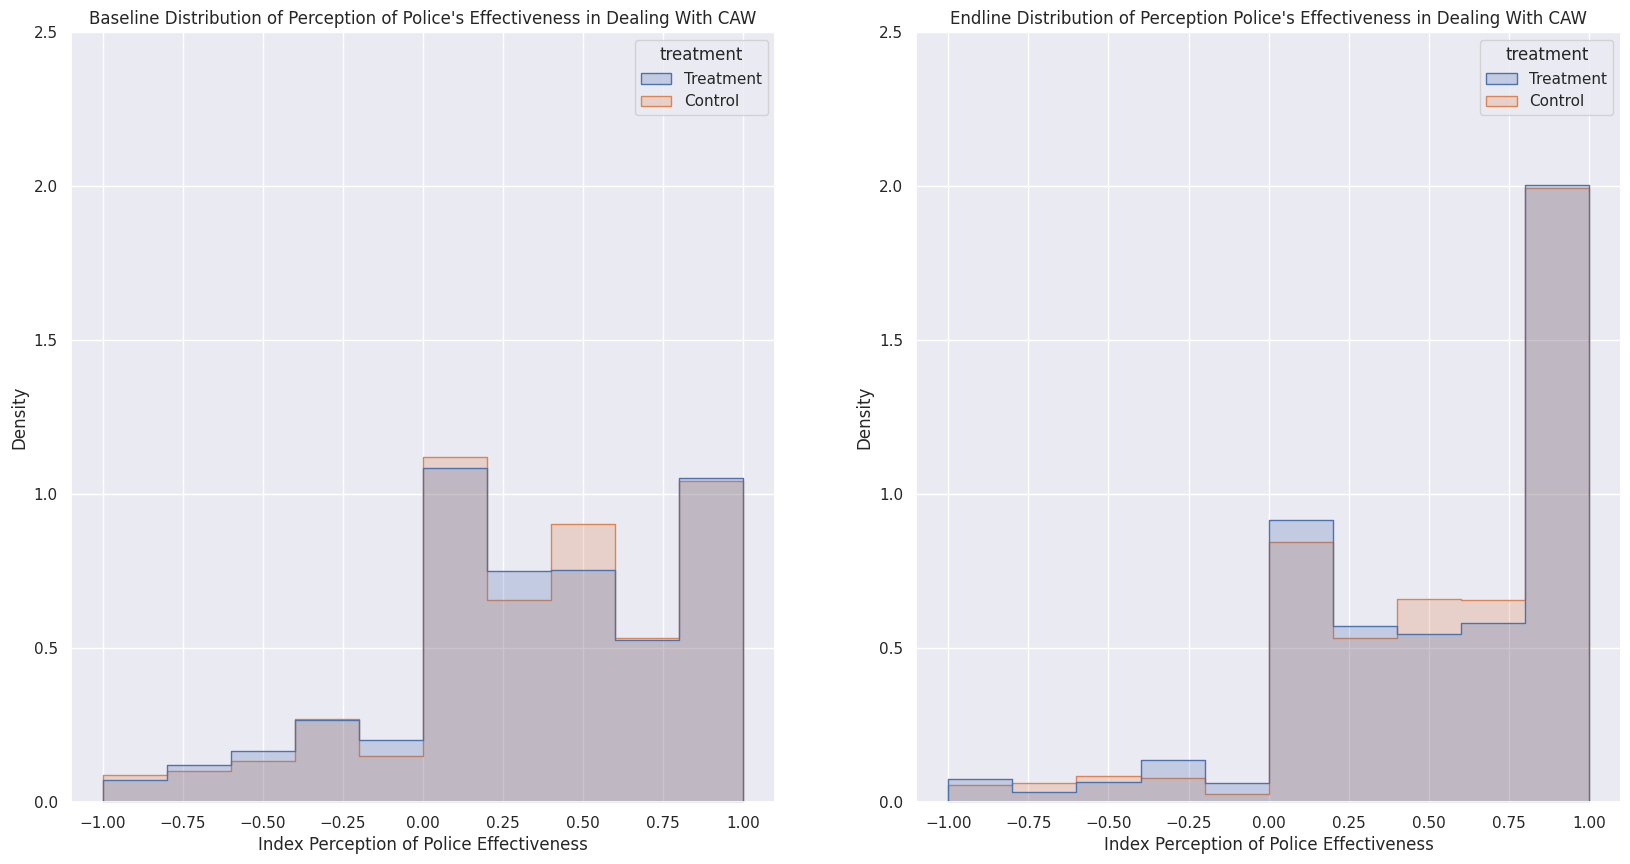

In [27]:
# create the plot dimensions
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

_ = sns.histplot(data = citizen_survey_df, x = "b_pol_handling", bins = 10, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[0])
_ = sns.histplot(data = citizen_survey_df, x = "e_pol_handling", bins = 10, hue = "treatment", element = "step", stat= "density", common_norm=False, ax = axes[1])

_ = axes[0].set_title("Baseline Distribution of Perception of Police's Effectiveness in Dealing With CAW")
_ = axes[1].set_title("Endline Distribution of Perception Police's Effectiveness in Dealing With CAW")

_ = axes[0].set_xlabel("Index Perception of Police Effectiveness")
_ = axes[1].set_xlabel("Index Perception of Police Effectiveness")

#Setting Y axis range
for i in range(0,2):
  axes[i].set_ylim([0,2.5])
  axes[i].set_autoscaley_on(False)

Again this is plotted on a density plot as the treatment group has a larger sample size. Looking at the baseline plot we can see that there are a substantial amount of repondents reporting a positve outlook on the effectiness of the police. We can also see that the density of repsondents for the bin [0.00 - 0.20] is approxiatly equal. At endline we see a enourmous shift to the last bin.

I will run a test to see if there is a statistical significance in responses from baseline to endline for both treatment groups. As this distribution is not normally distributied, I will utilize a nonparametric test.

In [28]:
#Creating pre and post dataframes for treatment

pre_treat = treatment_df['b_pol_handling']
post_treat = treatment_df['e_pol_handling']

#Creating pre and post dataframes for control

pre_control = control_df['b_pol_handling']
post_control = control_df['e_pol_handling']

In [29]:
#Conducting nonparametric tests for treatment group

wilcox_treat = stats.wilcoxon(pre_treat,post_treat)

display(wilcox_treat)

WilcoxonResult(statistic=335223.5, pvalue=9.735872009647313e-40)

In [30]:
#conducting nonparametric tests for control group

wilcox_control = stats.wilcoxon(pre_control, post_control)

display(wilcox_control)

WilcoxonResult(statistic=98920.0, pvalue=2.4790442743003727e-22)

Both treatment groups showed a statistical sigificance. However, at endline since the treatmetn groups distributions are nearly identical, I sense that there was a counfounding variable that caused these results. It could be that respondents felt an internal pressure to report that the police were more effective.